# Solving Ordinary Differential Equations (ODEs) using Python

Simple differential equations can be solved numerically using the Euler-Cromer method, but more complicated differential equations may require a
more sophisticated method. The "scipy" library for Python contains numerous functions for scientific computing and data analysis. It includes the function
**odeint** for numerically solving sets of first-order, ordinary differential equations (ODEs) using a sophisticated algorithm. Any set of differential equations can be written in the required form.  
The example below calculates the solution to the second-order differential equation,  

$$
\frac{d^2x}{dt^2} = ax + b\frac{dx}{dt}.
$$  
It can be rewritten as the two first-order differential equations,  

$$
\frac{dx}{dt} = \dot{x}
$$
and
$$
\frac{d\dot{x}}{dt} = ax + b\dot{x}.
$$  
Notice that the first of these equations is really just a definition. In Python, the function $x$ and its derivative $\dot{x}$ will be elements of an array. The function $x$ will be the first element $x[0]$ (remember that the lowest index of an array is zero, not one) and the derivative $\dot{x}$ will be the second element $x[1]$. The index indicates how many derivatives are taken of the function. In this notation, the differential equiations are  

$$
\frac{dx[0]}{dt} = x[1]
$$  
and
$$
\frac{dx[1]}{dt} = ax[0] + bx[1].
$$  
The **odeint** function requires a function (called **deriv** in the example below) that will return the first derivative of each of element in the array. In other words, the first element returned is $dx[0]/dt$ and the second element is $dx[1]/dt$, which are both functions of $x[0]$ and $x[1]$. You must also provide initial values for $x[0]$ and $x[1]$,  which are placed in
the array $yinit$ in the example below. Finally, the values of the times at which solutions are desired are provided in the array $time$. Note that **odeint** returns the values of both the function $x[0]=x$ and its derivative $x[1]=dx/dt$ at each time in an array $x$.  The function is plotted versus time.

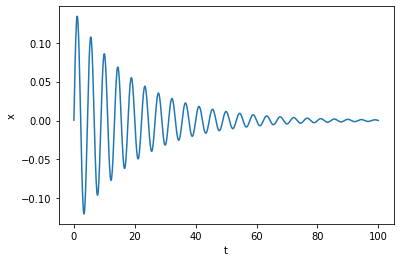

In [1]:
from scipy.integrate import odeint
import pylab as pl

def deriv(x,t):  # return derivatives of the array y
    a = -2.0
    b = -0.1
    return pl.array([ x[1], a*x[0]+b*x[1]])

time = pl.linspace(0.0,100.0,1000)
xinit = pl.array([0.0005,0.2])  # initial values
x = odeint(deriv,xinit,time)

pl.figure()
pl.plot(time,x[:,0])  # x[:,0] is the first column of x
pl.xlabel('t')
pl.ylabel('x')
pl.show()

For a second example, suppose that you want to solve the following
coupled, second-order differential equations,  

$$
\frac{d^2x}{dt^2} = ay
$$
and
$$
\frac{d^2y}{dt^2} = b + c\frac{dx}{dt}.
$$  
If we make the definitions,
$$
z[0]=x,
$$  
$$
z[1] = \frac{dx}{dt},
$$  
$$
z[2]=y,
$$
and
$$
z[3] = \frac{dy}{dt},
$$  
then the two second-order equations can be written as the four first-order equations,  

$$
\frac{dz[0]}{dt} = z[1],
$$  
$$
\frac{dz[1]}{dt} = az[2],
$$  
$$
\frac{dz[2]}{dt} = z[3],
$$  
and
$$
\frac{dz[3]}{dt} = b + cz[1].
$$  
These equations are now in a form necessary for the derivative function, w
hich would be an array with four elements. Notice that the index of the array is not the number of derivatives of a single function in this case.


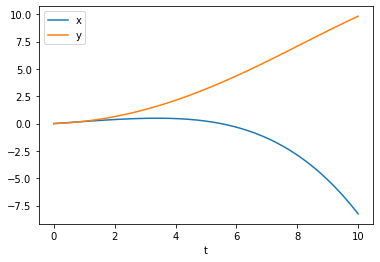

In [2]:
from scipy.integrate import odeint
import pylab as pl

def deriv(z,t):  # return derivatives of the array y
    a = -0.1
    b = 0.2
    c = 0.1
    return pl.array([z[1], a*z[2], z[3], b+c*z[1]])

time = pl.linspace(0.0,10.0,1000)
zinit = pl.array([0,0.2,0,0.1])  # initial values
z = odeint(deriv,zinit,time)

pl.figure()
pl.plot(time,z[:,0],label='x')  # z[:,0] is the first column of z
pl.plot(time,z[:,2],label='y')  # z[:,2] is the third column of z
pl.xlabel('t')
pl.legend(loc='upper left')
pl.show()

##Exercise

An example of a differential equation that exhibits chaotic behavior is 
$$\frac{d^3x}{dt^3} = -2.017 \frac{d^2x}{dt^2} + \left(\frac{dx}{dt}\right)^2 - x.$$
<ol>
<li> Write the differential equation as a set of three <i>first-order</i>
differential equations.
<li> Modify the example program to solve the equations with the initial conditions of $x=0$, $dx/dt = 0$, and $d^2x/dt^2 = 1$.
<li> Plot the results for $x$ for $t$ from 0 to 100.
</ol>

## Additional Documentation

Further information is available at:  
http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html  